In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [2]:
datasets = os.walk('./test_results').__next__()[1]

df = pd.DataFrame(columns=['dataset', 'exp_type', 'num_labeled', 'test_loss', 'test_acc', 'test_ece'])
for dataset in datasets:
    exp_types = os.walk('./test_results/' + dataset).__next__()[1]
    for exp_type in exp_types:
        metrics = pd.read_csv(f'./test_results/{dataset}/{exp_type}/test_metrics.csv')
        for num_labeled in metrics['num_labeled']:
            test_loss = metrics[metrics['num_labeled'] == num_labeled]['test_loss'].values[0]
            test_acc = metrics[metrics['num_labeled'] == num_labeled]['test_acc'].values[0]
            test_ece = metrics[metrics['num_labeled'] == num_labeled]['test_ece'].values[0]

            df.loc[len(df)] = {'dataset': dataset, 'exp_type': exp_type, 'num_labeled': num_labeled, 'test_loss': test_loss, 'test_acc': test_acc, 'test_ece': test_ece}

In [3]:
df

,dataset,exp_type,num_labeled,test_loss,test_acc,test_ece
0,dermamnist,baseline-softmax,4000,1.297928,0.770075,0.177703
1,dermamnist,active-jempp,250,2.335950,0.654863,0.280364
2,dermamnist,active-jempp,500,2.063288,0.696758,0.241718
3,dermamnist,active-jempp,750,1.960011,0.720200,0.230856
4,dermamnist,active-jempp,1000,1.884063,0.717207,0.227886
...,...,...,...,...,...,...
178,organcmnist,active-jempp,3000,0.273185,0.920156,0.023053
179,organcmnist,active-jempp,3250,0.308012,0.916018,0.033217
180,organcmnist,active-jempp,3500,0.311564,0.909202,0.022668
181,organcmnist,active-jempp,3750,0.259834,0.919060,0.020477


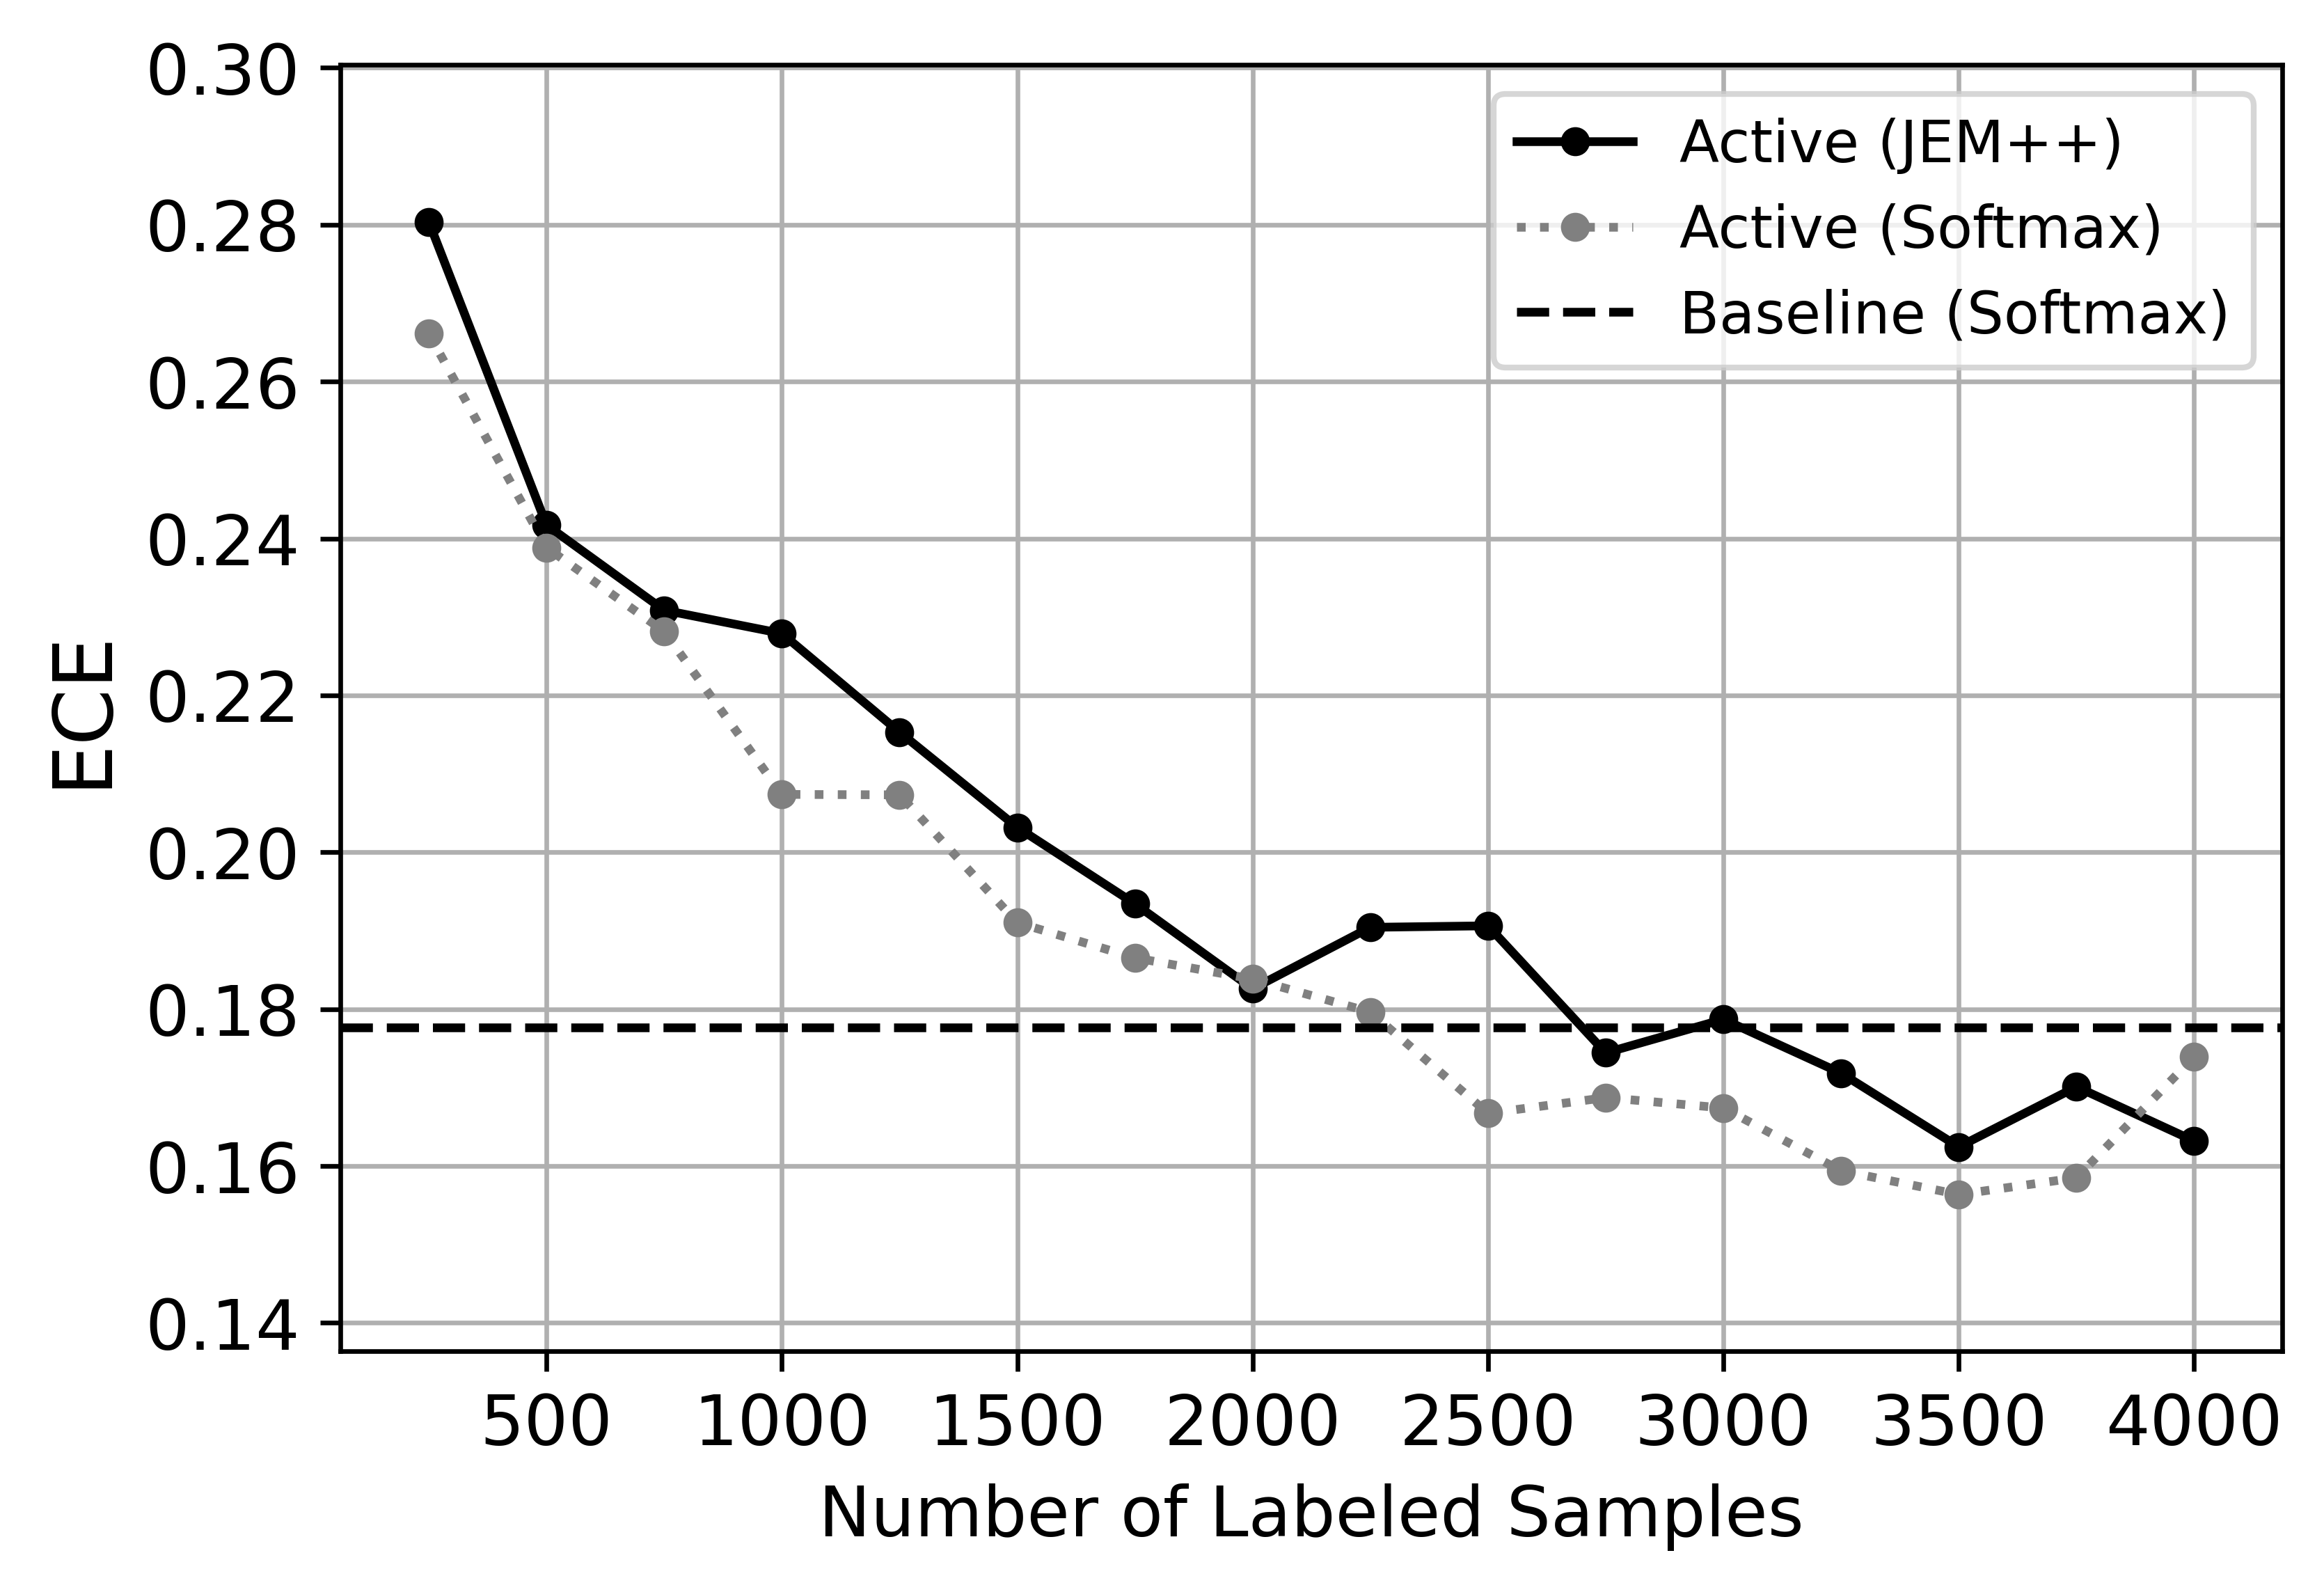

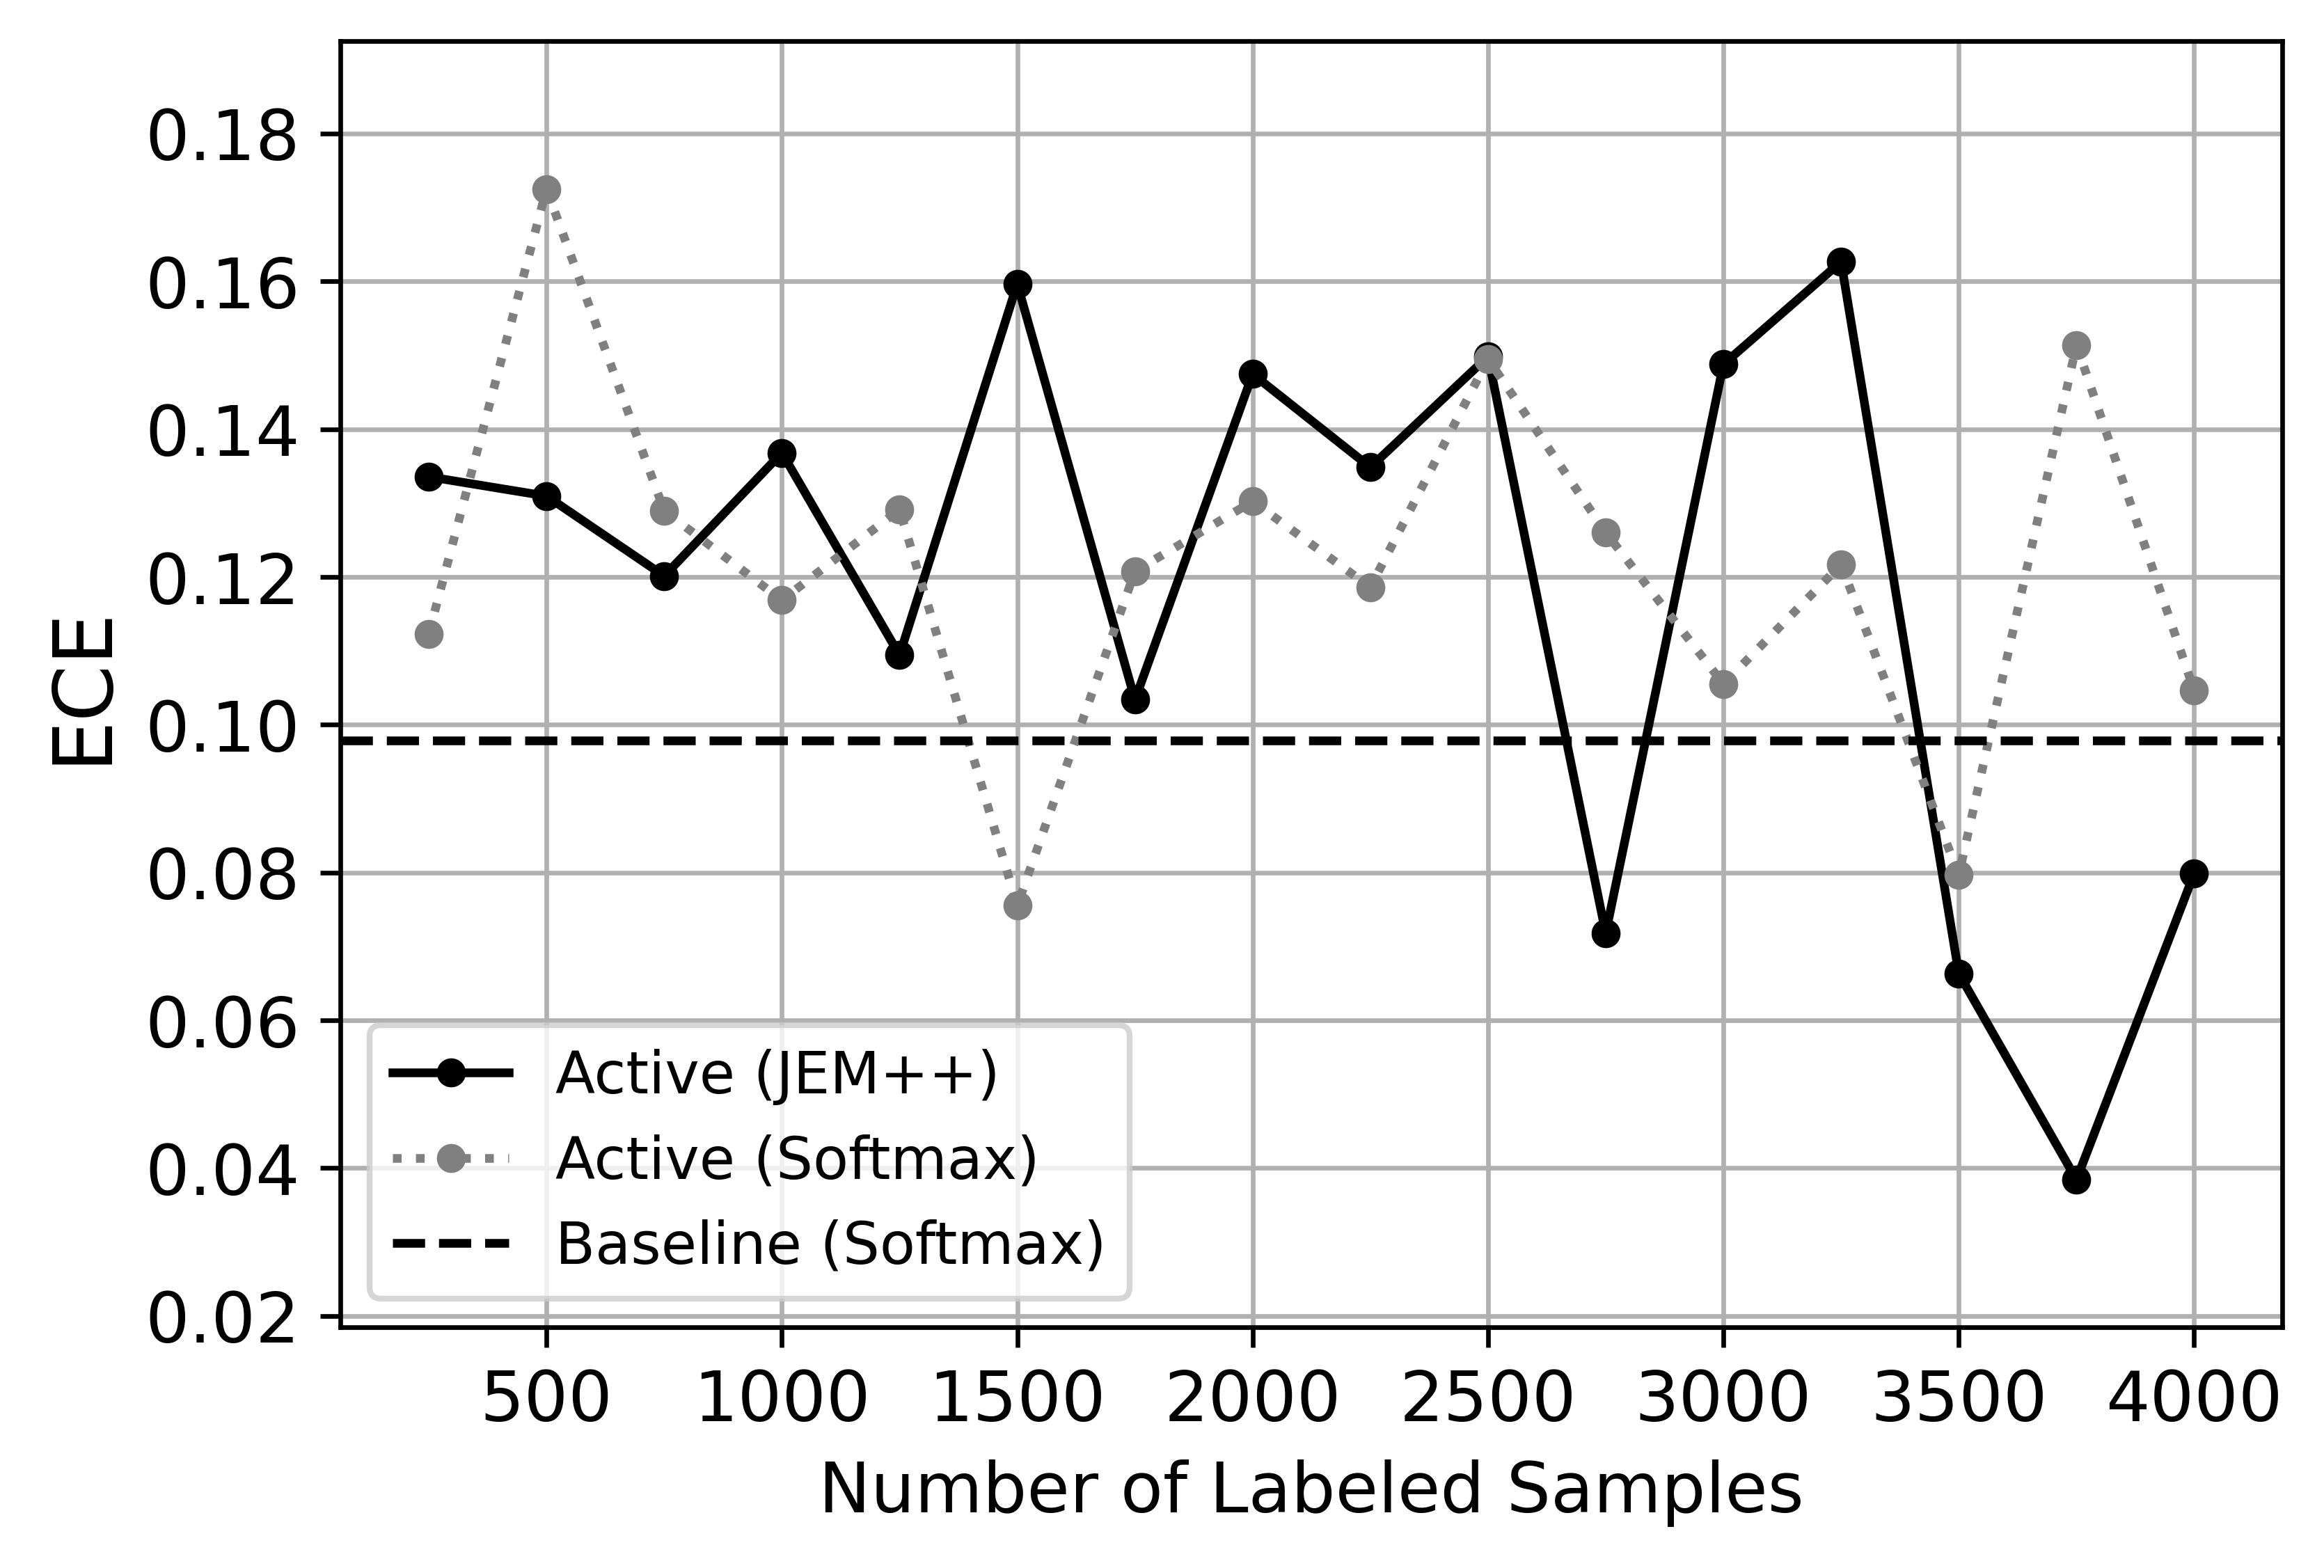

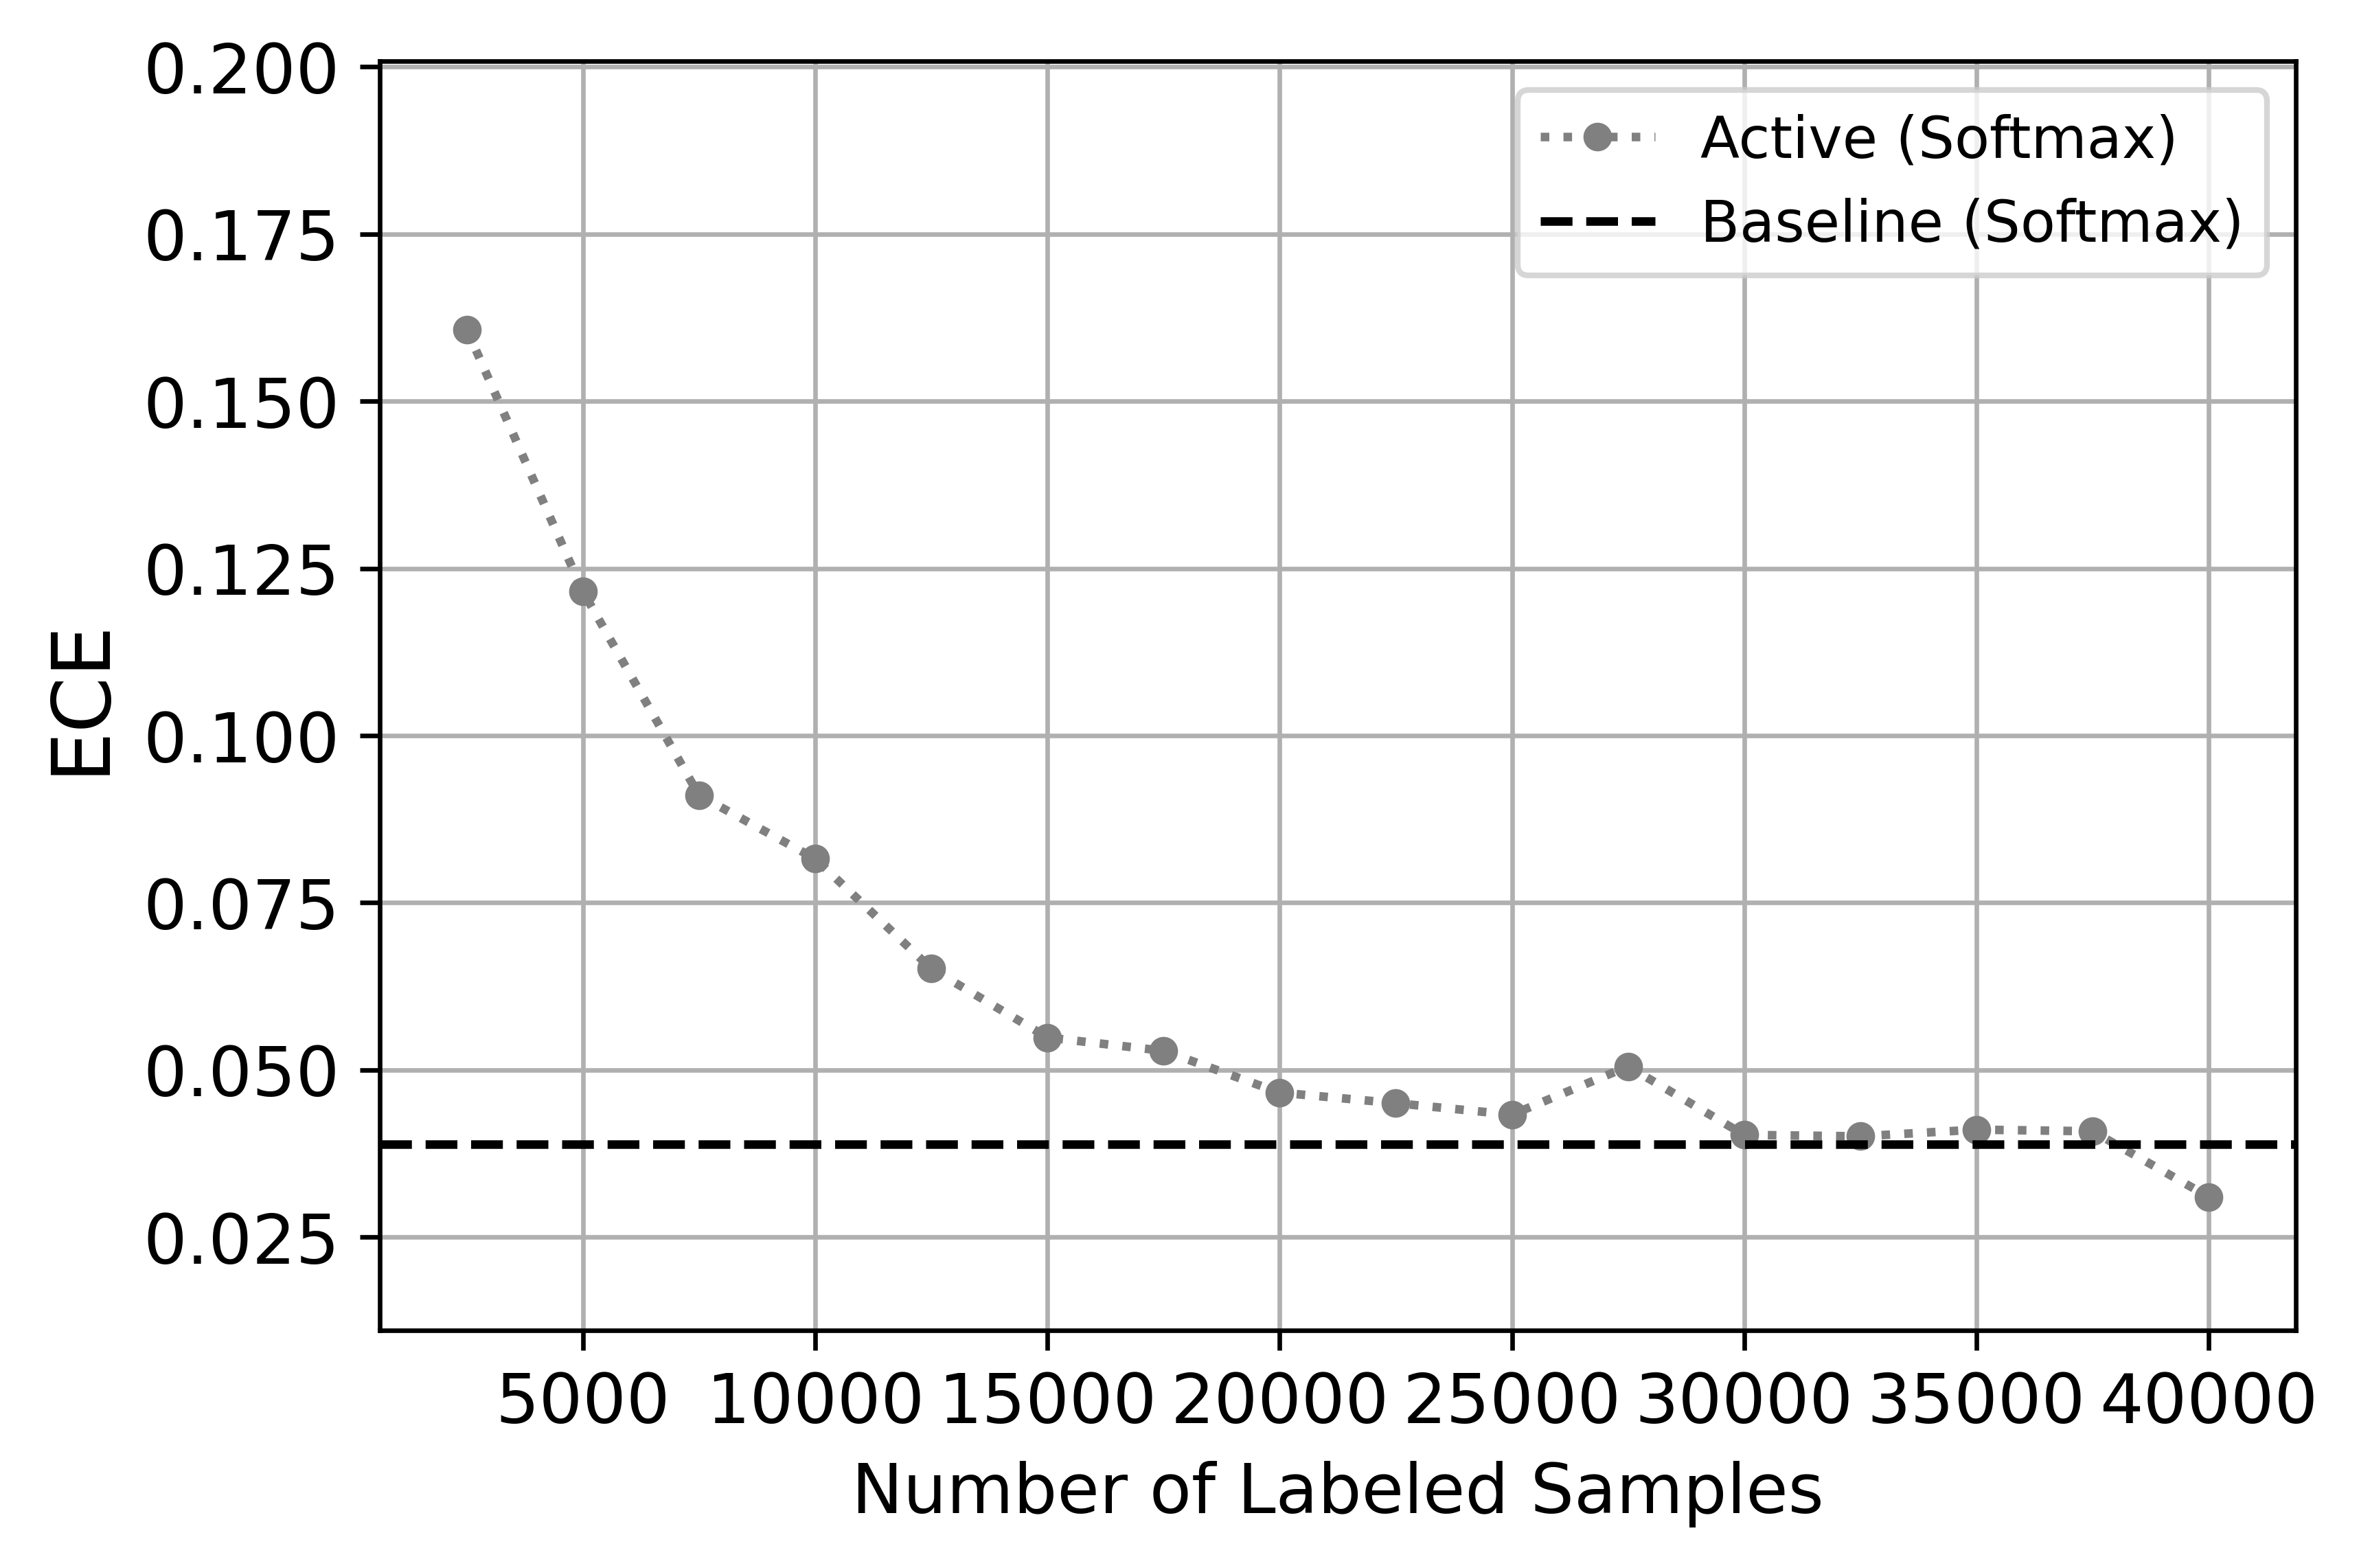

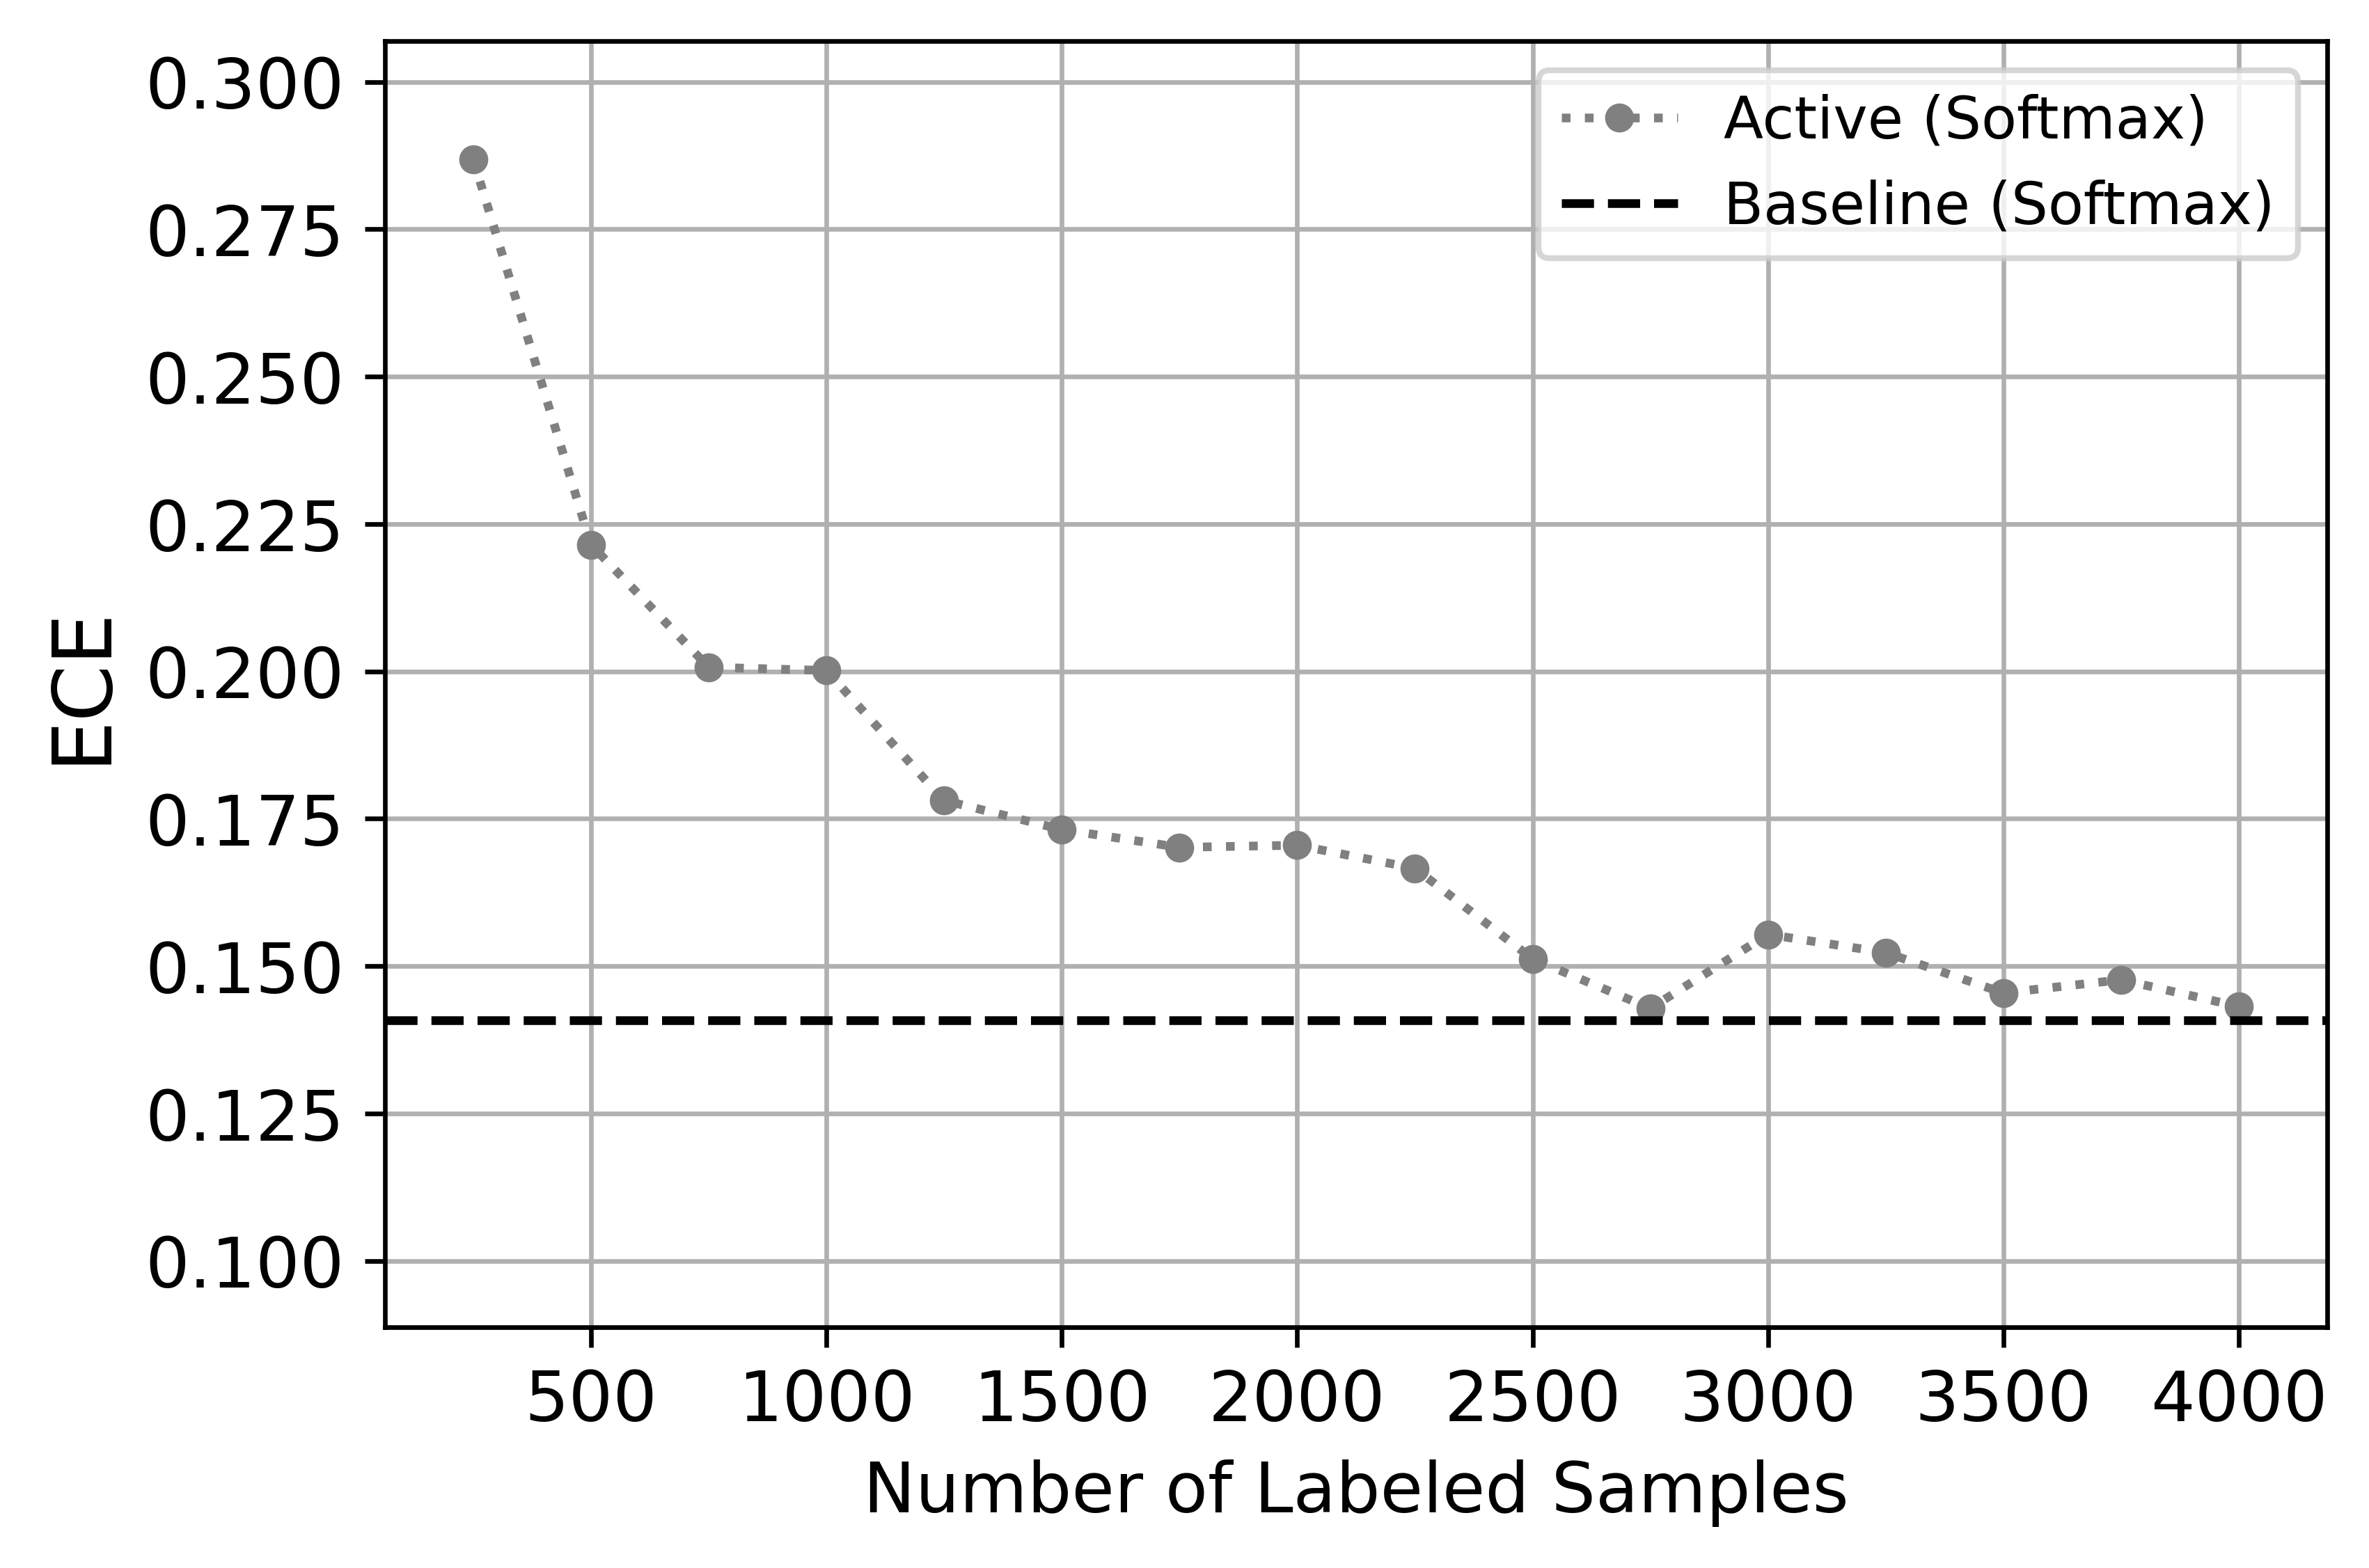

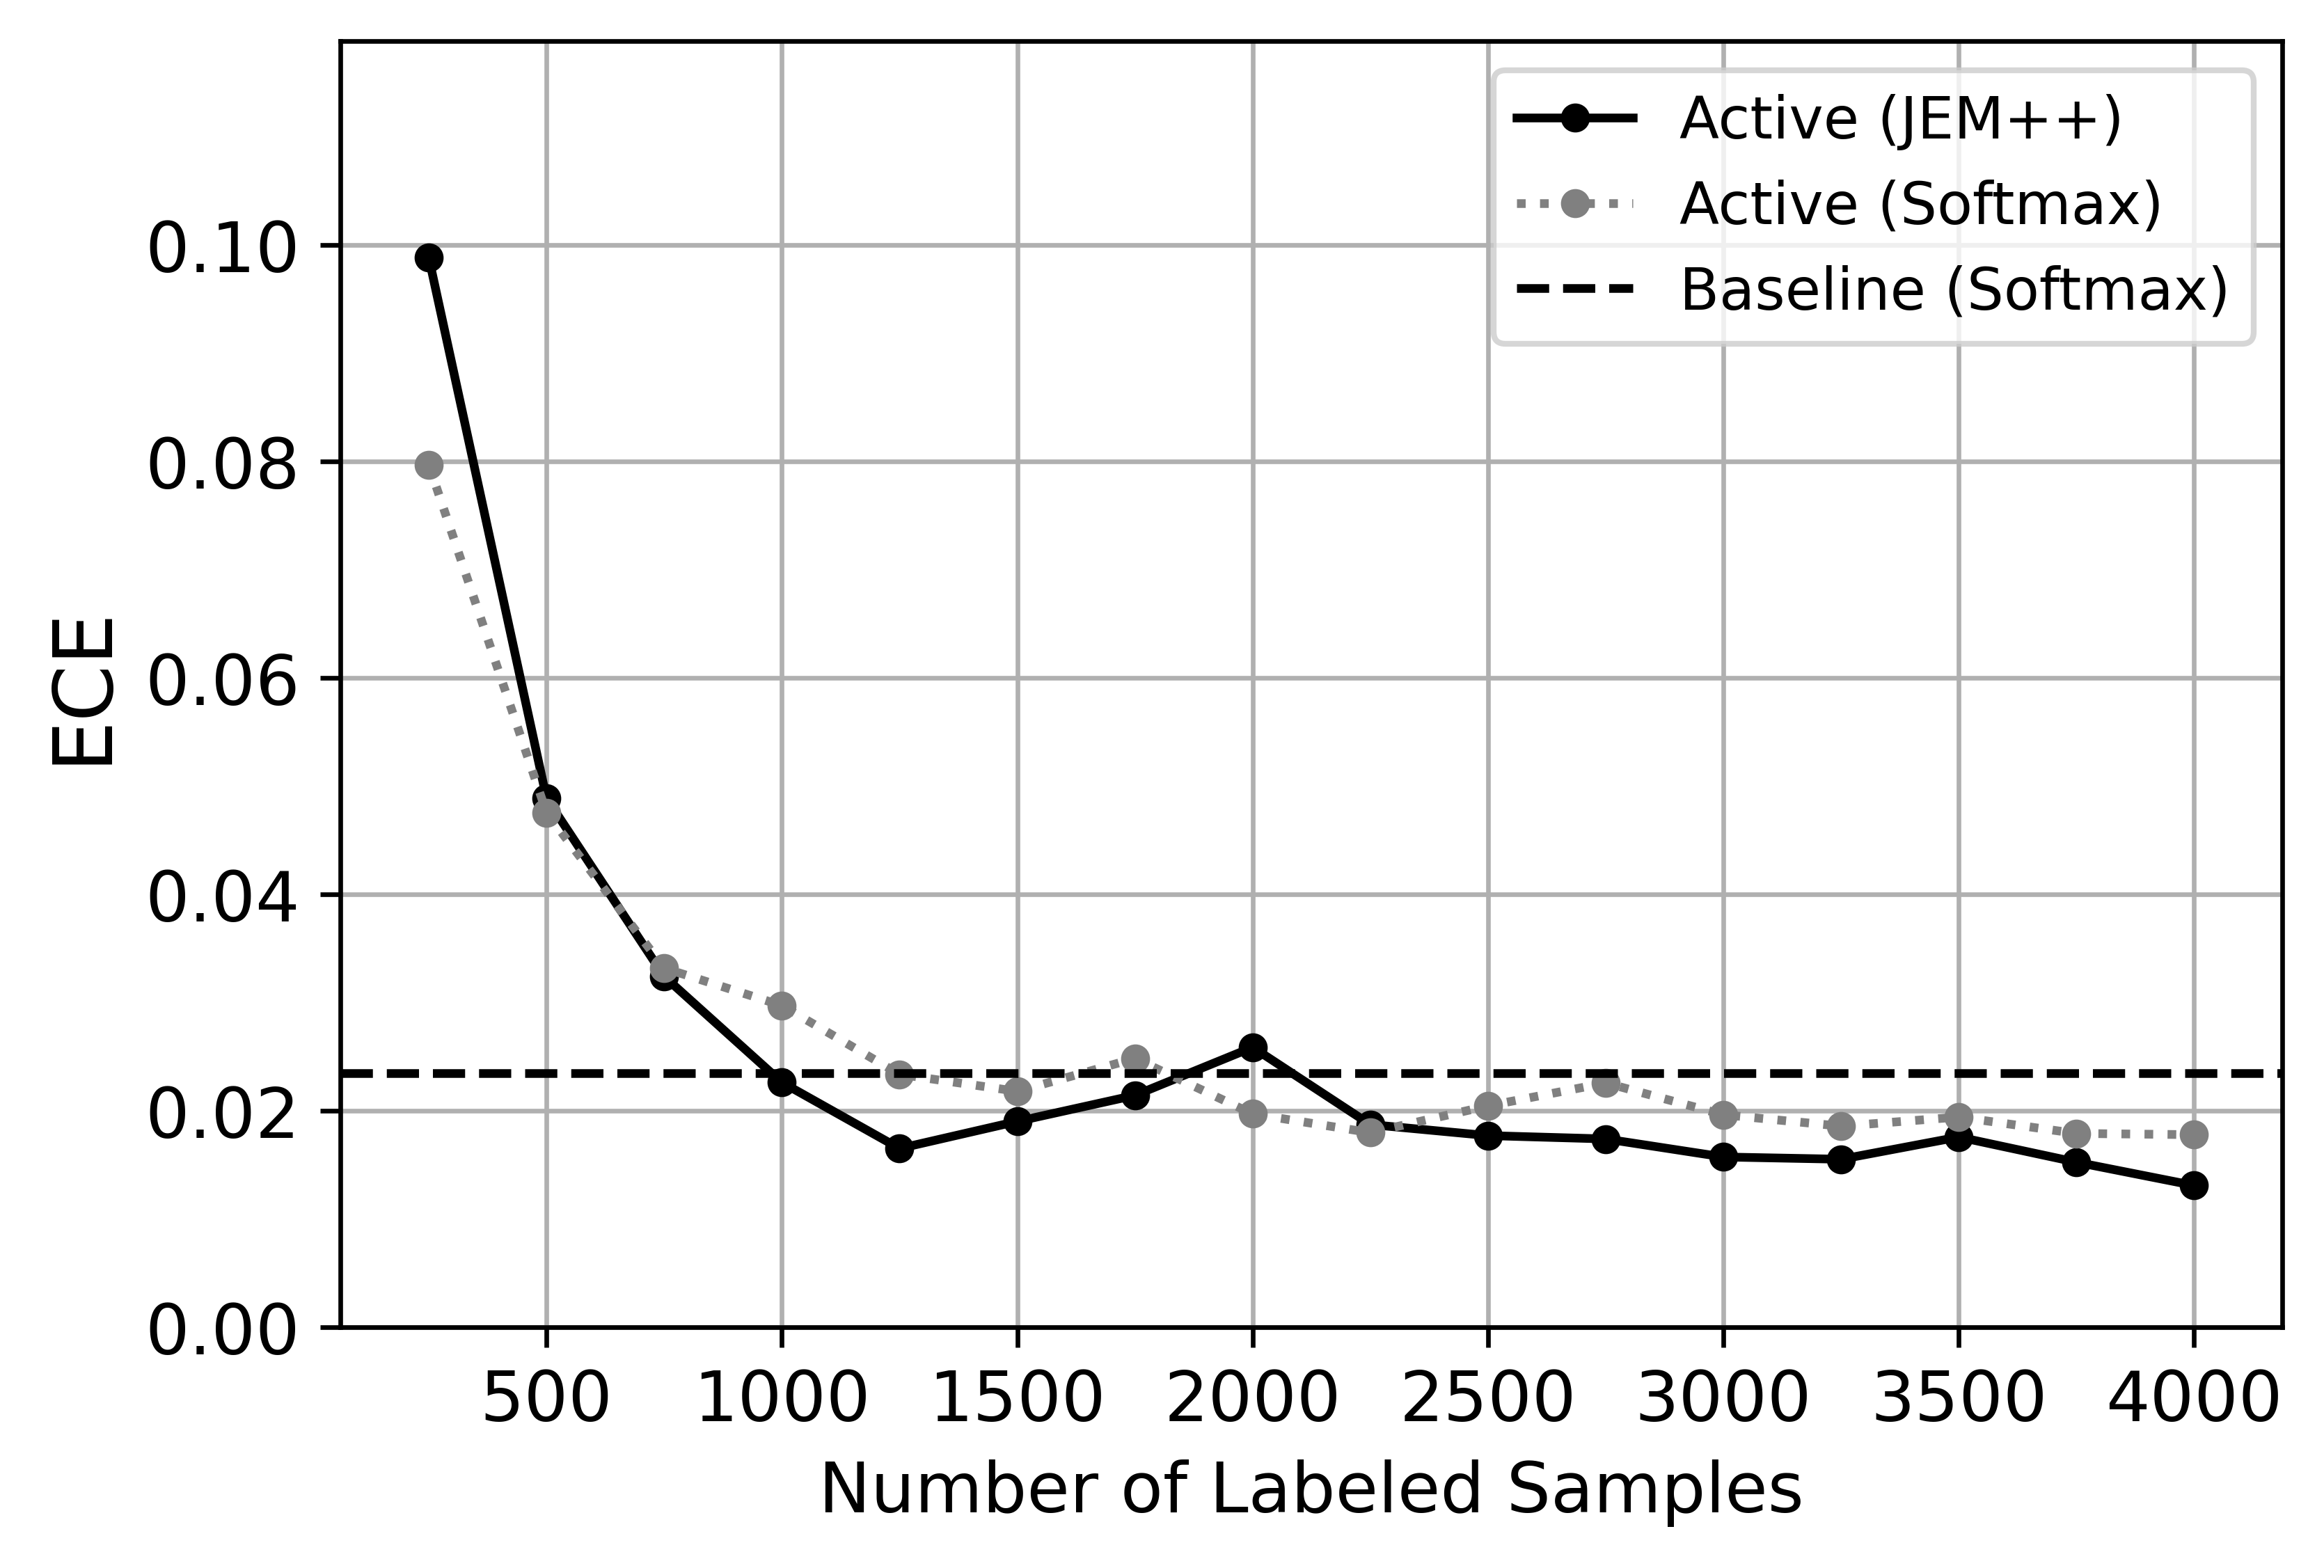

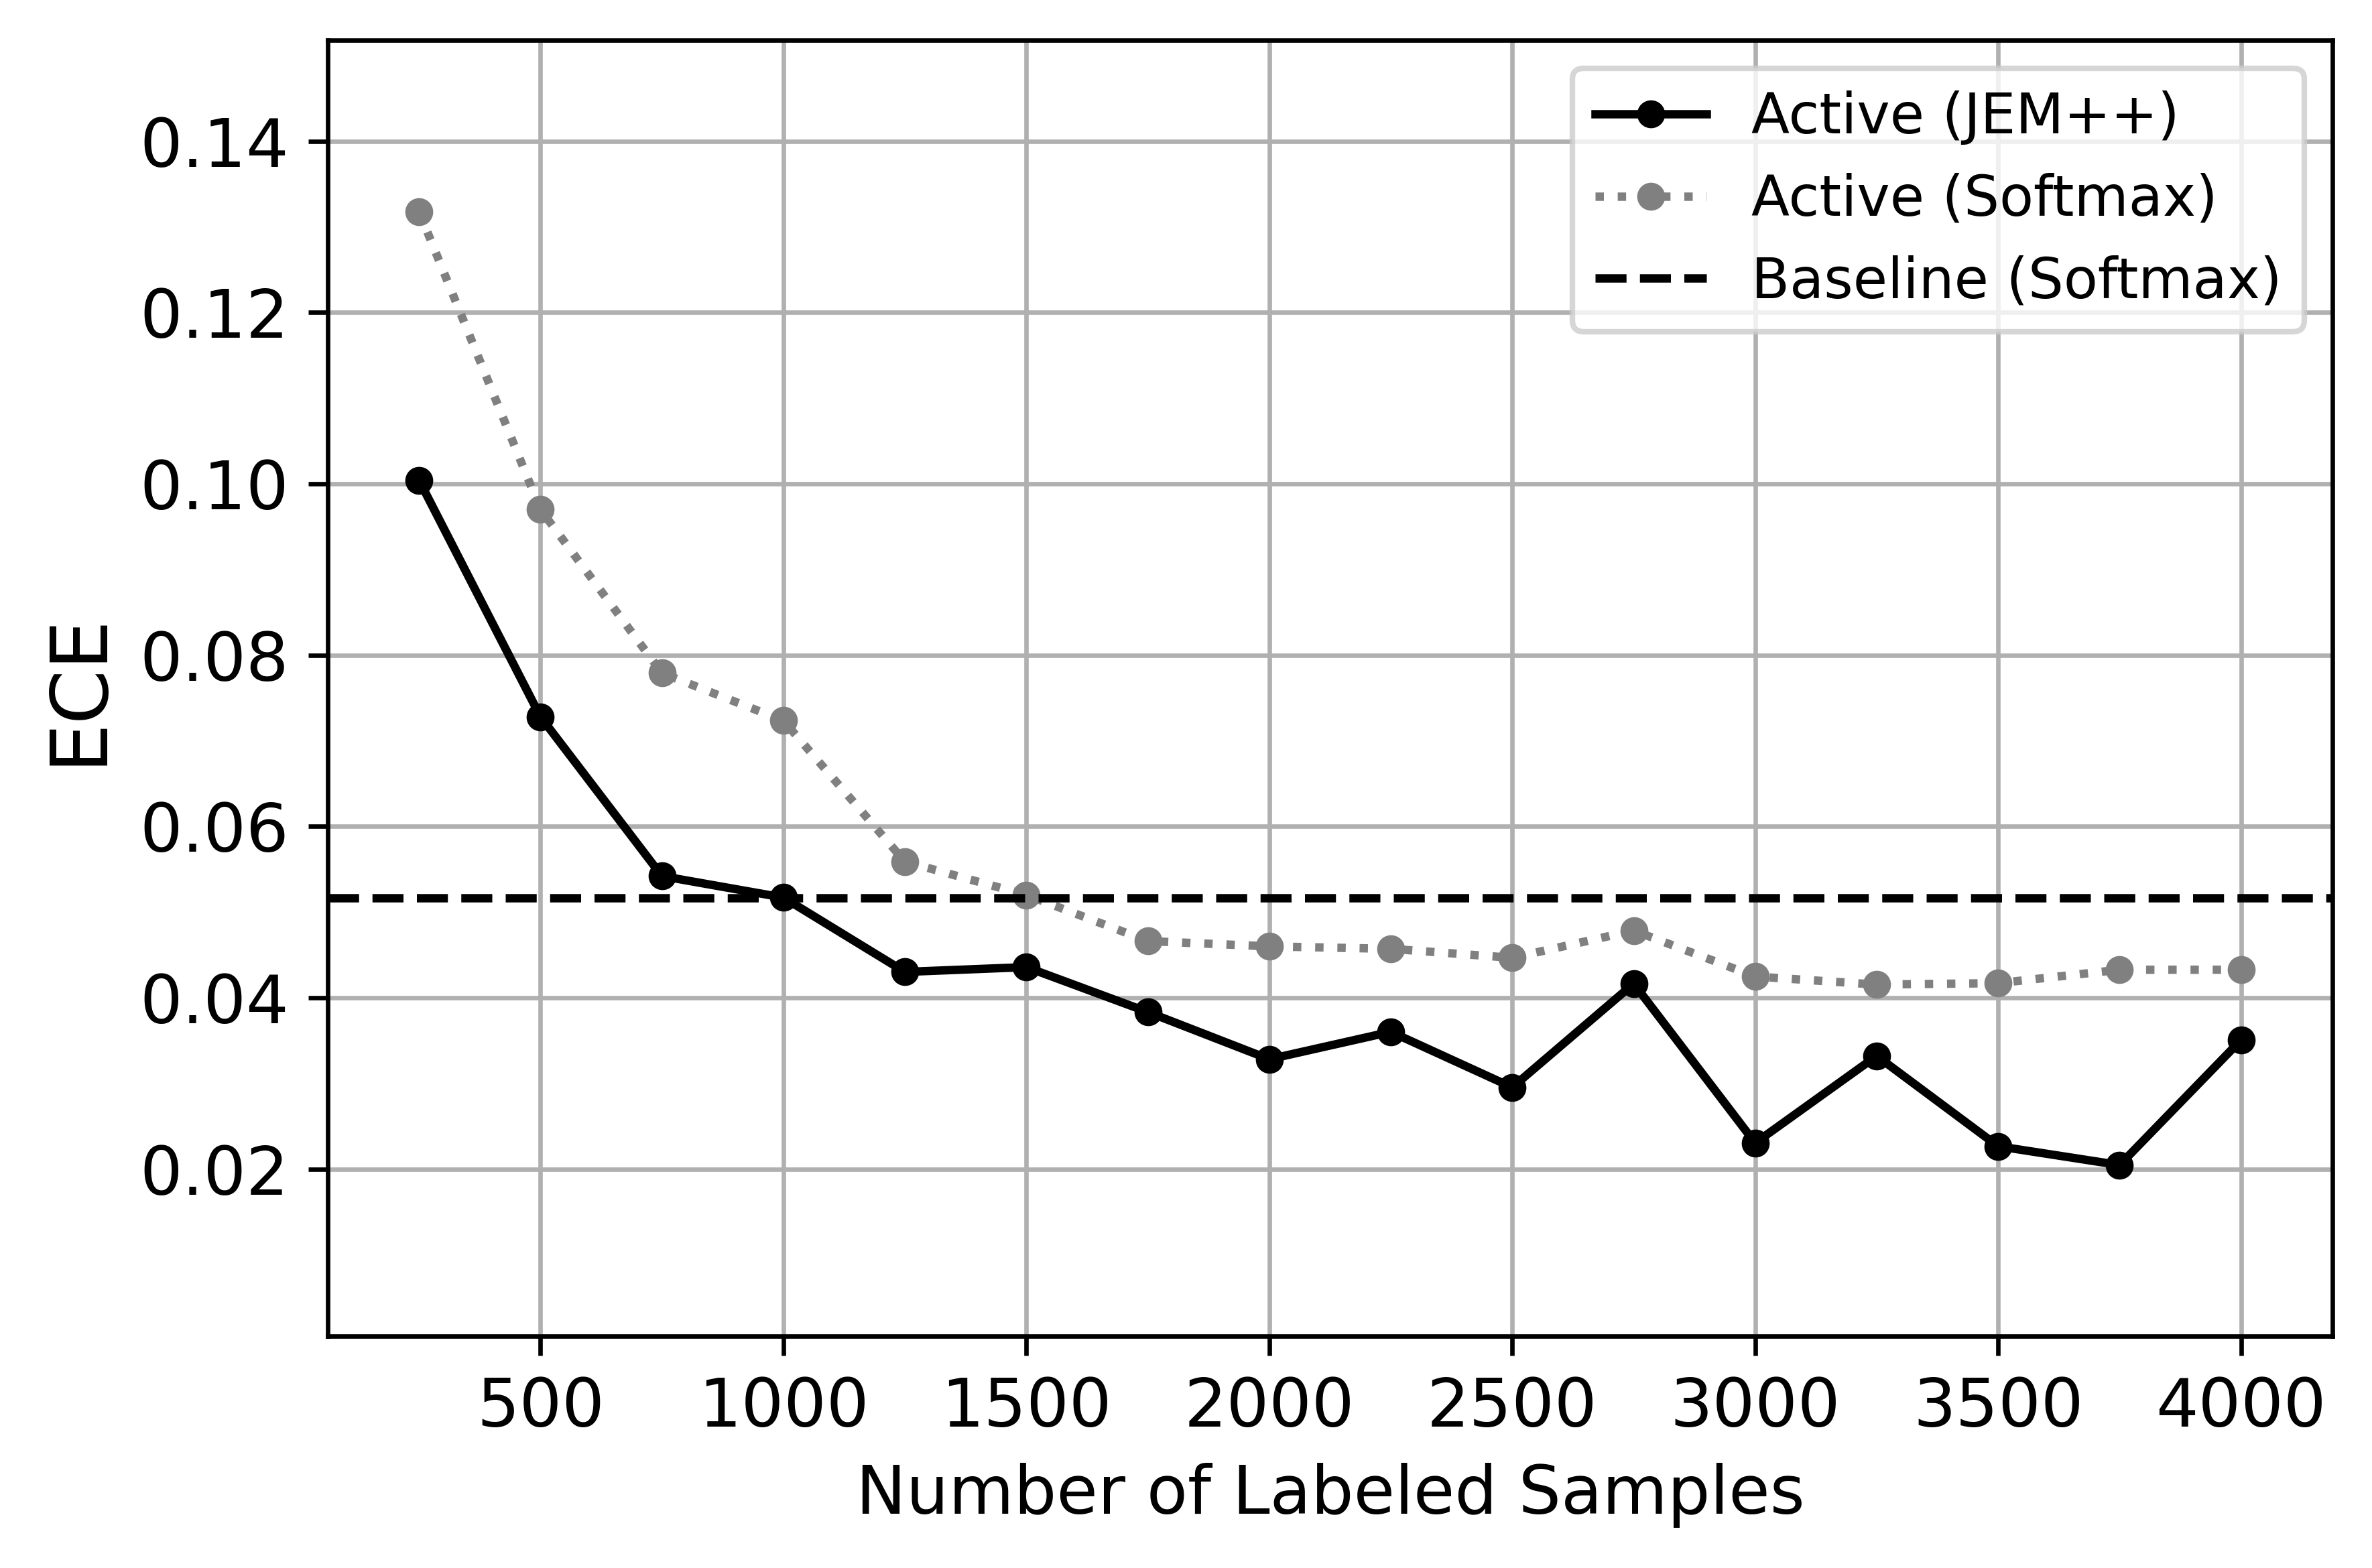

In [4]:
# Define the datasets and optimization methods
datasets = df['dataset'].unique()

# Iterate over the datasets
for i, dataset in enumerate(datasets):
    # Filter the data for the current dataset
    df_filtered = df[df['dataset'] == dataset]

    # plot the ece over num_labeled
    fig, ax = plt.subplots(figsize=(6, 4), dpi=600)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # check if df_filtered as active_jempp
    if "active-jempp" in df_filtered['exp_type'].unique():
        # Plot the ECE mean for the active calibrated and uncalibrated methods
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-jempp"]

        ax.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_ece'],
            color="black",
            marker="o",
            markersize=4,
            label="Active (JEM++)",
        )

    if "active-softmax" in df_filtered['exp_type'].unique():
        df_active_softmax = df_filtered[df_filtered['exp_type'] == "active-softmax"]
        ax.plot(
            df_active_softmax['num_labeled'],
            df_active_softmax['test_ece'],
            color="gray",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active (Softmax)",
        )

    if "baseline-softmax" in df_filtered['exp_type'].unique():
        df_baseline = df_filtered[df_filtered['exp_type'] == "baseline-softmax"]
        ax.axhline(
            df_baseline['test_ece'].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline (Softmax)",
        )

    # set min and max y limits (0.2 above and below the min and max values), if min goes below 0, set to 0
    min_y = df_filtered["test_ece"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_ece"].max() + 0.02
    ax.set_ylim([min_y, max_y])

    # Set the title, labels, and legend
    
    ax.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax.set_ylabel("ECE", fontsize=14)
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.legend(loc="best")
    ax.grid()

plt.tight_layout()
plt.show()